In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import datapane


In [2]:
article = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/articles_hm.csv") # articles_hm 상품
customer = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/customer_hm.csv") # customer_hm 고객
transaction = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/transactions_hm.csv") # transactions_hm 거래

transaction

,t_dat,customer_id,article_id,price,sales_channel_id
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1
...,...,...,...,...,...
1048570,2019-03-25,8e900818a1da0e73300a012794615993fbefb43f851430...,766346001,0.025407,2
1048571,2019-10-18,13aa106eeb8a6fa2f9e2ab888a3a2ee118a3900670f0d8...,811905001,0.016932,2
1048572,2019-04-06,5f51e21397c1248aafdf9712435bd4be063eb093f56229...,690108001,0.021729,2
1048573,2019-03-20,3421bd479ee13287a65660cf816b01d0d803d1d6d0fe73...,583534002,0.016932,2


In [3]:
# article.isnull().sum() # 제품 상세설명 null : 416

In [4]:
# TRnCU = transaction.merge(customer, on = 'customer_id', how = 'inner') #거래, 고객 inner join
# All = TRnCU.merge(article, on = 'article_id', how = 'inner') # 거래고객, 상품 inner join

# All.isnull().sum() # 모두 조인한 csv의 결측치

In [5]:
# channel_sales = All.groupby("sales_channel_id")["price"].sum()
# channel_sales.plot(kind="bar", title = "sales by chennel")
# plt.show()

# All["age_group"] = (All["age"] // 10) * 10
# age_sales = All.groupby("age_group")["price"].mean()
# age_sales.plot(kind="line", marker="o", title="Average Spending by age group")
# plt.show()


In [6]:
# customer

customer_id                    0
FN                             0
Active                         0
club_member_status             0
fashion_news_frequency         0
age                            0
t_dat                     695015
article_id                695015
price                     695015
sales_channel_id          695015
dtype: int64

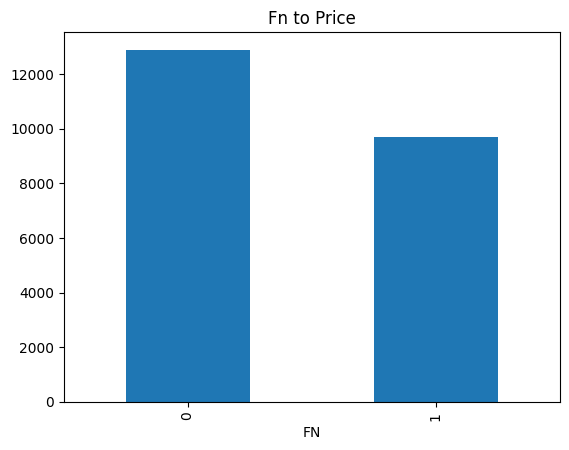

In [7]:
CnT = customer.merge(transaction, on = 'customer_id', how = 'inner')
fn_sales = CnT.groupby("FN")["price"].sum()  # 패션뉴스 구독률에 따른 매출량
# fn_sales = CnT.groupby("FN").count() # 행 개수
fn_sales.plot(kind = 'bar', title = "Fn to Price")

CnT2 = customer.merge(transaction, on = 'customer_id', how = 'left')
CnT2.isnull().sum()

<Axes: xlabel='month'>

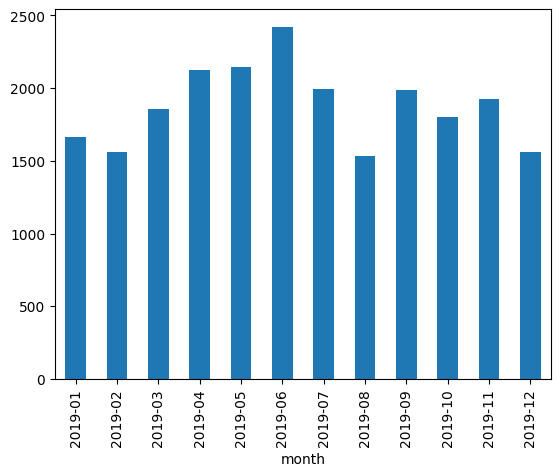

In [8]:
transaction["t_dat"] = pd.to_datetime(transaction["t_dat"]) # t_dat을 datetime타입으로 변환
transaction["month"] = transaction["t_dat"].dt.strftime("%Y-%m") #월별 컬럼 생성
CnT = customer.merge(transaction, on = 'customer_id', how = 'inner')


month_price = CnT.groupby("month")["price"].sum()
month_price.plot(kind = "bar") #월별 매출

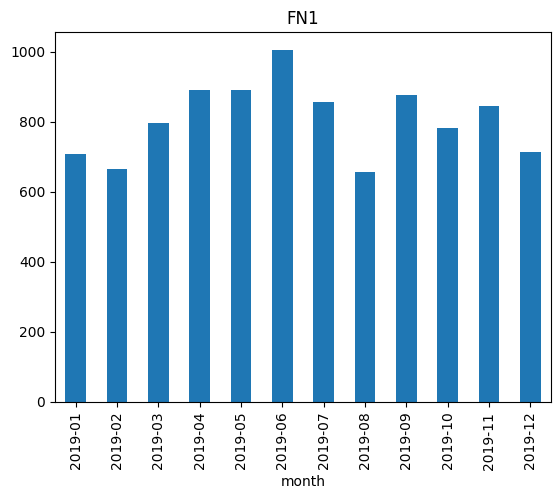

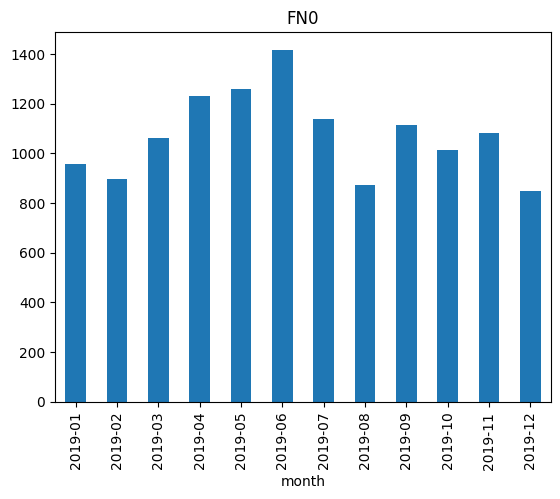

In [9]:
month_price_fn1 = (
    CnT.loc[CnT["FN"] == 1].groupby("month")["price"].sum()
)
month_price_fn1.plot(kind = "bar", title = "FN1") # 월별 매출, FN이 1인 경우
plt.show()

month_price_fn0 = (
    CnT.loc[CnT["FN"] == 0].groupby("month")["price"].sum()
)
month_price_fn0.plot(kind = "bar", title = "FN0")
plt.show()

<Axes: title={'center': 'month to fn to price'}, xlabel='month'>

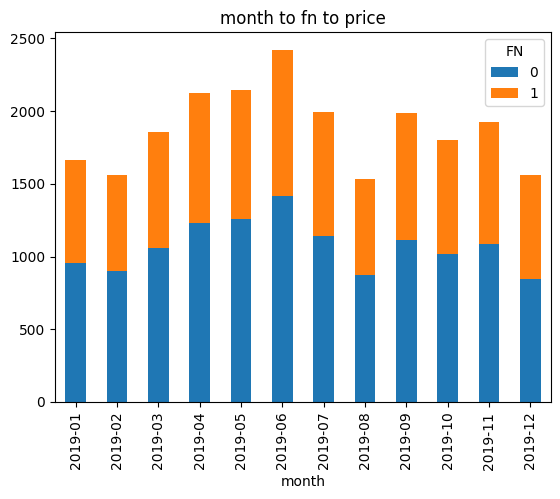

In [10]:
month_price_fn = (
    CnT.groupby(["month", "FN"])["price"].sum().unstack("FN", fill_value = 0)
)
month_price_fn.plot(kind = "bar", stacked=True, title = "month to fn to price")

<Axes: title={'center': 'month to saleschannel to price'}, xlabel='month'>

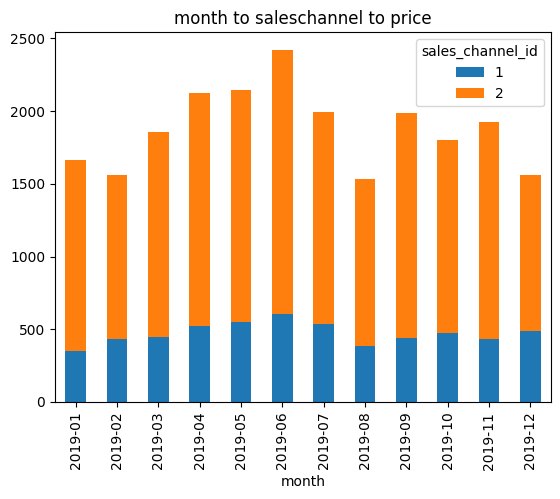

In [11]:
month_salescha = CnT.groupby(["month", "sales_channel_id"])["price"].sum()

month_sale_df = (
    month_salescha.unstack("sales_channel_id", fill_value=0).sort_index() # fill_value는 결측치를 채울 값
)
month_sale_df.plot(kind = "bar", stacked = True, title = "month to saleschannel to price")

(array([18078., 18085., 18092., 18099., 18109., 18116., 18123., 18130.,
        18140.]),
 [Text(18078.0, 0, '2019-07-01'),
  Text(18085.0, 0, '2019-07-08'),
  Text(18092.0, 0, '2019-07-15'),
  Text(18099.0, 0, '2019-07-22'),
  Text(18109.0, 0, '2019-08-01'),
  Text(18116.0, 0, '2019-08-08'),
  Text(18123.0, 0, '2019-08-15'),
  Text(18130.0, 0, '2019-08-22'),
  Text(18140.0, 0, '2019-09-01')])

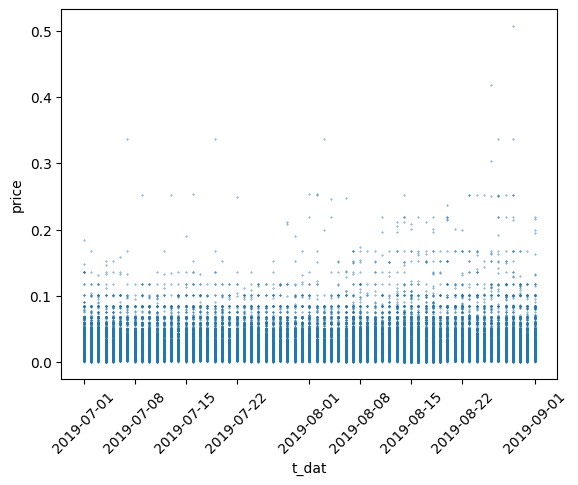

In [ ]:
mask1 = (CnT["t_dat"] >= "2019-06") & (CnT["t_dat"] <= "2019-09")
CnT_3m = CnT.loc[mask1].copy()

mask2 = (CnT["t_dat"] >= "2019-01") & (CnT["t_dat"] <= "2019-05")
CnT_6m = CnT.loc[mask2].copy()

mask3 = (CnT["t_dat"] >= "2019-10") & (CnT["t_dat"] <= "2019-12")
CnT_9m = CnT.loc[mask3].copy()

CnT_3m.plot.scatter(
    x = "t_dat", y = "price", s = 0.1
)
plt.xticks(rotation = 45)

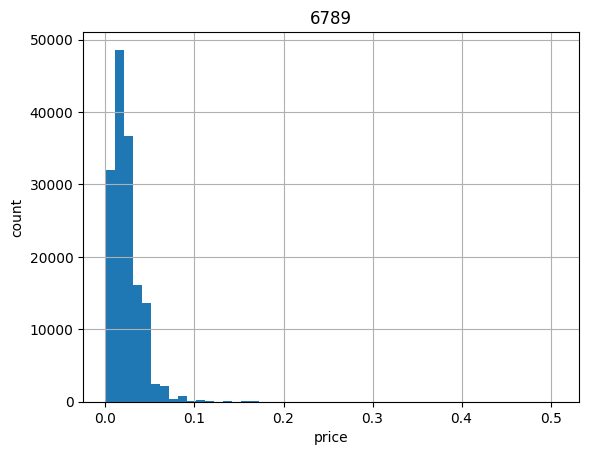

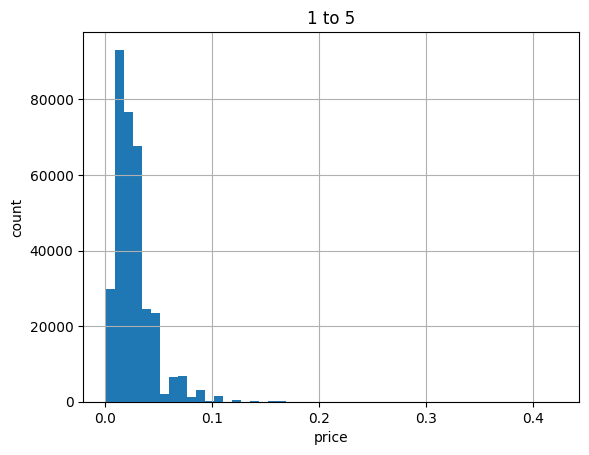

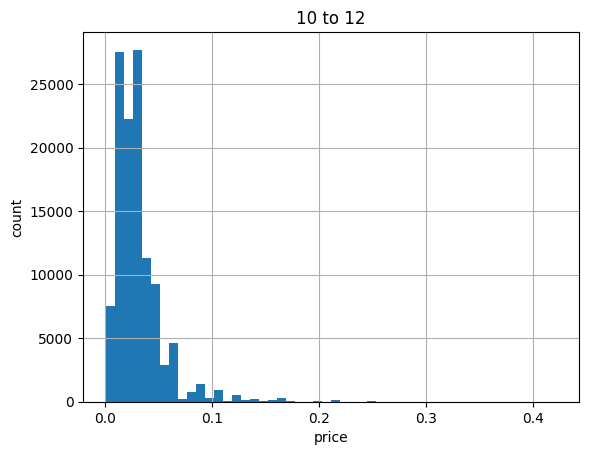

In [14]:
CnT_3m["price"].hist(bins = 50)
plt.xlabel("price")
plt.ylabel("count")
plt.title("6789")
plt.show()

CnT_6m["price"].hist(bins = 50)
plt.xlabel("price")
plt.ylabel("count")
plt.title("1 to 5")
plt.show()

CnT_9m["price"].hist(bins = 50)
plt.xlabel("price")
plt.ylabel("count")
plt.title("10 to 12")
plt.show()

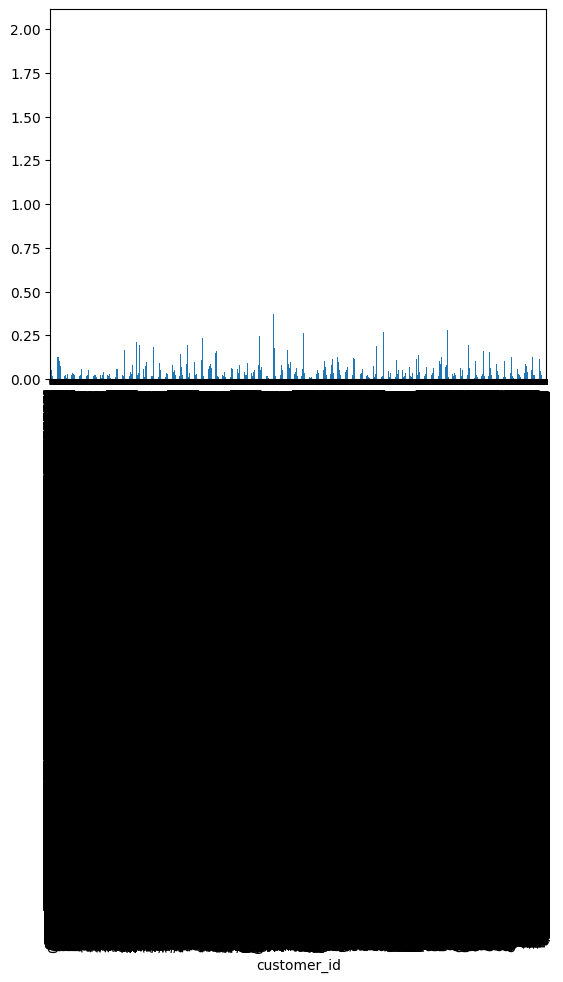

In [ ]:
TnA = transaction.merge(article, on = "article_id", how = "inner")
TnA["t_dat"] = pd.to_datetime(transaction["t_dat"])
TnA["month"] = transaction["t_dat"].dt.strftime("%Y-%m") # TnA["t_dat"].info

vip = TnA.groupby("customer_id")["price"].sum().plot(kind = "bar")
TnA.count()